<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Numerical_integration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical integration

In the previous lecture we developed algorithms that could integrate a function given in an executable form, $f(x)$ or as a set of tabulated (discrete) data $<x_i, f_i>$.

We will now look at 2 algoroithms specialized to the case of having $f(x)$.

##Richardson extrapolation

Richardson extrapolation is an algorithm that conceptually uses successive applications of the trapezoid rule with differing step size to achieve superior results with less effort.

The exact integral can always be expressed:
$$ I = I'(h) + E(h)$$
where $I'(h)$ is the approximation with step $h$ and the associated error $E(h)$. We know that $E(h) \propto h^2$ for the trapezoid rule. In fact, it is $E(h) \propto f'' h^2$.

Let's sample the interval twice with step sizes $h_1$ and $h_2$. If we assume $f''$ doesn't change much we can say,

$$ \begin{align}
\frac{E(h_1)}{E(h_2)} = \frac{h_1^2}{h_2^2}.
\end{align}$$

Now, since the exact integral is the same in both cases,
$$\begin{align}
I'(h_1) + E(h_1) &= I'(h_2) + E(h_2) \\
I'(h_1) + E(h_2) \bigg(\frac{h_1}{h_2}\bigg)^2 &= I'(h_2) + E(h_2) \\
E(h_2) &=\frac{I'(h_1) -I'(h_2)}{1-(\frac{h_1}{h_2})^2}  \\
\end{align}
$$

and inserted into the formula for $h_2$,

$$
\begin{align}
I&\approx I(h_2)+ \frac{I'(h_1) -I'(h_2)}{1-(\frac{h_1}{h_2})^2} \\
\end{align}
$$

which can be shown to be accurate to $O(h^4)$!

For the special case where $h_1 = 2 h_2$ (which has advantages for overlapping point evaluations)

$$
I \approx \frac{4}{3} I(h_2) -\frac{1}{3} I(h_1)
$$

This is an interesting result! Effectively what we have done is use a second estimate to estimate the next power in our expansion, leading to a higher order estimate!

## Romberg Integration Algorithm

In fact we can repeat this proceedure arbitrarily! Above we combined two order $O(h^2)$ to make $O(h^4)$. We can take this results, combine it with another sampling at $h_3 < h_2$ and combine to get an $O(h^6)$ estimate and so on! If we successively halve the step size, we can get:

$$\begin{align}
I^4 &\approx \frac{4}{3} I(h_2) -\frac{1}{3} I(h_1) \\
I^6 &\approx \frac{16}{15} I(h_3) - \frac{1}{15} I^4 \\
I^8 &\approx \frac{64}{63} I(h_4) - \frac{1}{63} I^6 \\
\vdots \\
I_{j,k} &\approx \frac{4^{k-1} I_{j+1,k-1} - I_{j,k-1}}{4^{k-1}-1}
\end{align}$$

where the last line is the Romberg Integration Algorithm. The structure lends itself to redundant programming and parallelizes nicely!

This algorithm is able to integrate to an arbitrary accuracy and does so remarkably efficiently compared to the alternatives.


#### Example

Approximate $\int_0^\pi \sin(x) dx$ using the Rhomberg rule and compare with Simpson's 1/3 rule

In [ ]:
import numpy as np
import scipy as sp
def f(x):
  return np.sin(x)

tolerance = 1e-6

for n in [4,8,16,32,64, 128]:
  x = np.linspace(0, np.pi, n+1)
  f_x = f(x)
  rhomberg = sp.integrate.romb(f_x, dx = np.pi/n, show=True)
  print(f"Romberg with {n} intervals: {abs(rhomberg-2)}")
  simpson = sp.integrate.simpson(f_x, x=x)
  print(f"Simpson with {n} intervals: {abs(simpson-2)}")

Richardson Extrapolation Table for Romberg Integration
 0.00000 
 1.57080  2.09440 
 1.89612  2.00456  1.99857 
Romberg with 4 intervals: 0.001429268176164289
Simpson with 4 intervals: 0.0045597549844207386
Richardson Extrapolation Table for Romberg Integration
 0.00000 
 1.57080  2.09440 
 1.89612  2.00456  1.99857 
 1.97423  2.00027  1.99998  2.00001 
Romberg with 8 intervals: 5.549979670949057e-06
Simpson with 8 intervals: 0.00026916994838765973
Richardson Extrapolation Table for Romberg Integration
 0.00000 
 1.57080  2.09440 
 1.89612  2.00456  1.99857 
 1.97423  2.00027  1.99998  2.00001 
 1.99357  2.00002  2.00000  2.00000  2.00000 
Romberg with 16 intervals: 5.412709835894702e-09
Simpson with 16 intervals: 1.6591047935499148e-05
Richardson Extrapolation Table for Romberg Integration
 0.00000 
 1.57080  2.09440 
 1.89612  2.00456  1.99857 
 1.97423  2.00027  1.99998  2.00001 
 1.99357  2.00002  2.00000  2.00000  2.00000 
 1.99839  2.00000  2.00000  2.00000  2.00000  2.00000 
Rom

Note the error became zero! What does that mean?

## Gaussian quadrature

Until this point, we have been using techniques for which the data points are at the limits of our subdomains. Let's relax this condition and allow the evaluation points to move around in the subdomain.

As we saw previously, we can gain in accuracy by cancelling positive and negative errors. Gaussian quadrature seeks to find special points in the subdomain where errors cancel.



## The method of undetermind coefficients

The method of undetermind coefficients is an approach that begins with the trapezoid rule and can extend to Gaussian quadrature.

Consider the approximation of an integral:

### Rederivation of the trapezoid rule

The Trapezoid rule must be exact when $f(x)$ is a straight line; examples of which are $f = 1$ and $f=x$. Therefore,

$$ I = c_0 + c_1 = \int_{(b-a)/2}^{(b-a)/2} dx = b-a$$

$$ I = -c_0 \frac{b-a}{2} + c_1 \frac{b-a}{2} = \int_{(b-a)/2}^{(b-a)/2} x dx = 0$$


With these 2 equations we can solve for $c_0 = c_1 = \frac{b-a}{2}$ and

$$ I = \frac{b-a}{2} f(a) + \frac{b-a}{2} f(b) $$

which is the trapezoid rule.

# The 2-point Gauss-Legendre formula

Now let's let the function evaluation points float within the subdomain:

$$ I\approx c_0 f(x_0) + c_1 f(x_1) $$

Since we now have 4 unknows, we require 4 conditions to determine them. Let's simply extend the conditions above to require that parabolas and cubics are also exactly integrated:

$$ \begin{align}
c_0 f(x_0) + c_1 f(x_1) &= \int_{-1}^1 1 dx  &= 2 \\
c_0 f(x_0) + c_1 f(x_1) &= \int_{-1}^1 x dx  &= 0 \\
c_0 f(x_0) + c_1 f(x_1) &= \int_{-1}^1 x^2 dx  &= \frac{2}{3} \\
c_0 f(x_0) + c_1 f(x_1) &= \int_{-1}^1 x^3 dx  &= 0 \\
\end{align} $$

which can be solved simultaneously to find,
$$ \begin{align}
c_0 &= c_1 = 1 \\
x_0 &= -\frac{1}{\sqrt{3}}\\
x_1 &= \frac{1}{\sqrt{3}}
\end{align} $$

and therefore:

$$ I = f\bigg(\frac{-1}{\sqrt{3}}\bigg)+f\bigg(\frac{1}{\sqrt{3}}\bigg) $$

That is a remarkable result! A cubic function can be integrated **exactly** meerly through the sum of the function evaluated at 2 points?!?

In [1]:
import numpy as np

def two_point_gaussian_quadrature(f):
  #Calculates the integral of a function between -1 and 1 using 2-point Gaussian quadrature.
  return f(-1 / np.sqrt(3)) + f(1 / np.sqrt(3))

import sympy as sp

x = sp.var('x')

def quad_tester(f):
  fcn = sp.lambdify(x, f)
  fI = sp.integrate(f, (x, -1, 1))
  print('Function ', f, ' Integral is ', fI, ' error ', two_point_gaussian_quadrature(fcn)-fI)

quad_tester( x**2)
quad_tester( x**3-x**2+np.pi*x+17)
quad_tester( -10**9* x**3 + np.exp(8.314)*x**2 - np.pi**.5*x + 42)

Function  x**2  Integral is  2/3  error  2.22044604925031e-16
Function  x**3 - x**2 + 3.14159265358979*x + 17  Integral is  33.3333333333333  error  0
Function  -1000000000*x**3 + 4080.60279354035*x**2 - 1.77245385090552*x + 42  Integral is  2804.40186238289  error  0


#### Transformation to an arbitrary domain

To apply Gaussian quadrature to an arbitrary integration limits $[a,b]$ we simply do a coordinate transformation:

$$ x = a_0 + a_1 x_d$$

at the limits,
$$\begin{align}
a &= a_0 + a_1 (-1) \\
b &= a_0 + a_1 (1)
\end{align}$$

Such that,
$$\begin{align}
a_0 &= \frac{b+a}{2}\\
a_1 &= \frac{b-a}{2}
\end{align}$$

and therefore,

$$ x = \frac{[b+a] + [b-a] x_d}{2}$$
and
$$ dx = \frac{b-a}{2} dx_d$$

which can be inserted into the integrand function at which point to make a new function in the form Gaussian Quadrature expects.


In [ ]:
def flex_gq(f, a, b):
  x0 = (-1 / np.sqrt(3))
  x1 = (1 / np.sqrt(3))

  x_d0 = ((b + a) + (b - a) * x0) / 2
  x_d1 = ((b + a) + (b - a) * x1) / 2
  dx = (b - a) / 2

  return (f(x_d0) + f(x_d1))*dx

def flex_gq_tester(f, a, b):
  fcn = sp.lambdify(x, f)
  fI = sp.integrate(f, (x, a, b))
  print('Function ', f, ' Integral is ', fI, ' error ', flex_gq(fcn,a,b)-fI)

flex_gq_tester( x**2, 0, 1)
flex_gq_tester( x**3-x**2+np.pi*x+17, 0, 1)

Function  x**2  Integral is  1/3  error  0
Function  x**3 - x**2 + 3.14159265358979*x + 17  Integral is  18.4874629934616  error  -3.55271367880050e-15


Jinkies!

## The n-point Gauss-Legendre formula

The method may be generalized to higher-point problems that will find higher degree polynomials exactly.

$$ I = \sum_i c_i f(x_i) $$ with $c_i$ given in the table below:


| Integration order | Coefficient (ci) | Gauss Point (xi) | Error |
|---|---|---|---|
| 2 | 1 | $\pm \frac{1}{\sqrt{3}}$ | $f^{(4)}$ |
| 3 | $\frac{8}{9}$ | $0$ | $f^{(6)}$ |
|   | $\frac{5}{9}$ | $\pm \frac{3}{5}$ |
| 4 | $\frac{18 \pm \sqrt{30}}{36}$ | $\pm\sqrt{\frac{3}{7} \pm \frac{2}{7}\sqrt{\frac{6}{5}}}$ | $f^{(8)}$ |
$\vdots$

#### Error

Note that the error is given in terms of a derivative of $f$, since the step size is no longer an issue. In general, the error is,

$$Error = \frac{2^{2n+1} [n+1]!^4}{[2n+3][2n+2]!^3} f^(2n+2)(ξ)$$

i.e.: proportional to the $[2n+2]th$ derivative evaluated at some point ξ in $[-1,1]$.

## N-D Gauss-Legendre quadrature

Due to the separable nature of N-D integration, extension of this concept to N-D is an exercise in repeated application to determine coefficients and Gauss-points on some standard N-D interval.

### Quadrilateral elements

Consider the double integral,
$$ \int_{-1}^{1} \int_{-1}^{1} f(\alpha, \beta) d\alpha d\beta = \int_{-1}^{1} \bigg[\int_{-1}^{1} f(\alpha, \beta) d\alpha \bigg] d\beta$$

which can now be broken down into repeated applications of 1D integration.

We will need to transform the original quadrilateral into our standard range, for which we use:

$$\begin{align}
x(\alpha,\beta) &= \sum_{k=1}^4 N_k(\alpha,\beta)x_k \\
y(\alpha,\beta) &= \sum_{k=1}^4 N_k(\alpha,\beta)y_k
\end{align}$$

where $<x_k, y_k>$ are the coordinates of hte corners of the quadralateral, and the *shape functions* are,

$$\begin{align}
N_1(\alpha, \beta) = \frac{1}{4}[1-\alpha][1-\beta] \\
N_2(\alpha, \beta) = \frac{1}{4}[1+\alpha][1-\beta] \\
N_3(\alpha, \beta) = \frac{1}{4}[1+\alpha][1+\beta] \\
N_4(\alpha, \beta) = \frac{1}{4}[1-\alpha][1+\beta] \\
\end{align}$$

Note the shape functions are *bilinear* (linear in each coordinate) such that straight lines remain straight upon mapping.

The mapping distorts the area of the quadrilateral,

$$ dx dy = \bigg\| \frac{\partial <x,y>} {\partial <\alpha, \beta>} \bigg\| d\alpha d\beta$$
which can be derived from the relations above.

An example of a quadralateral with a 3rd integration order is below showing the mapping between computational coordinates (left) and *real* coordinates (right). Gauss points are given in circles.

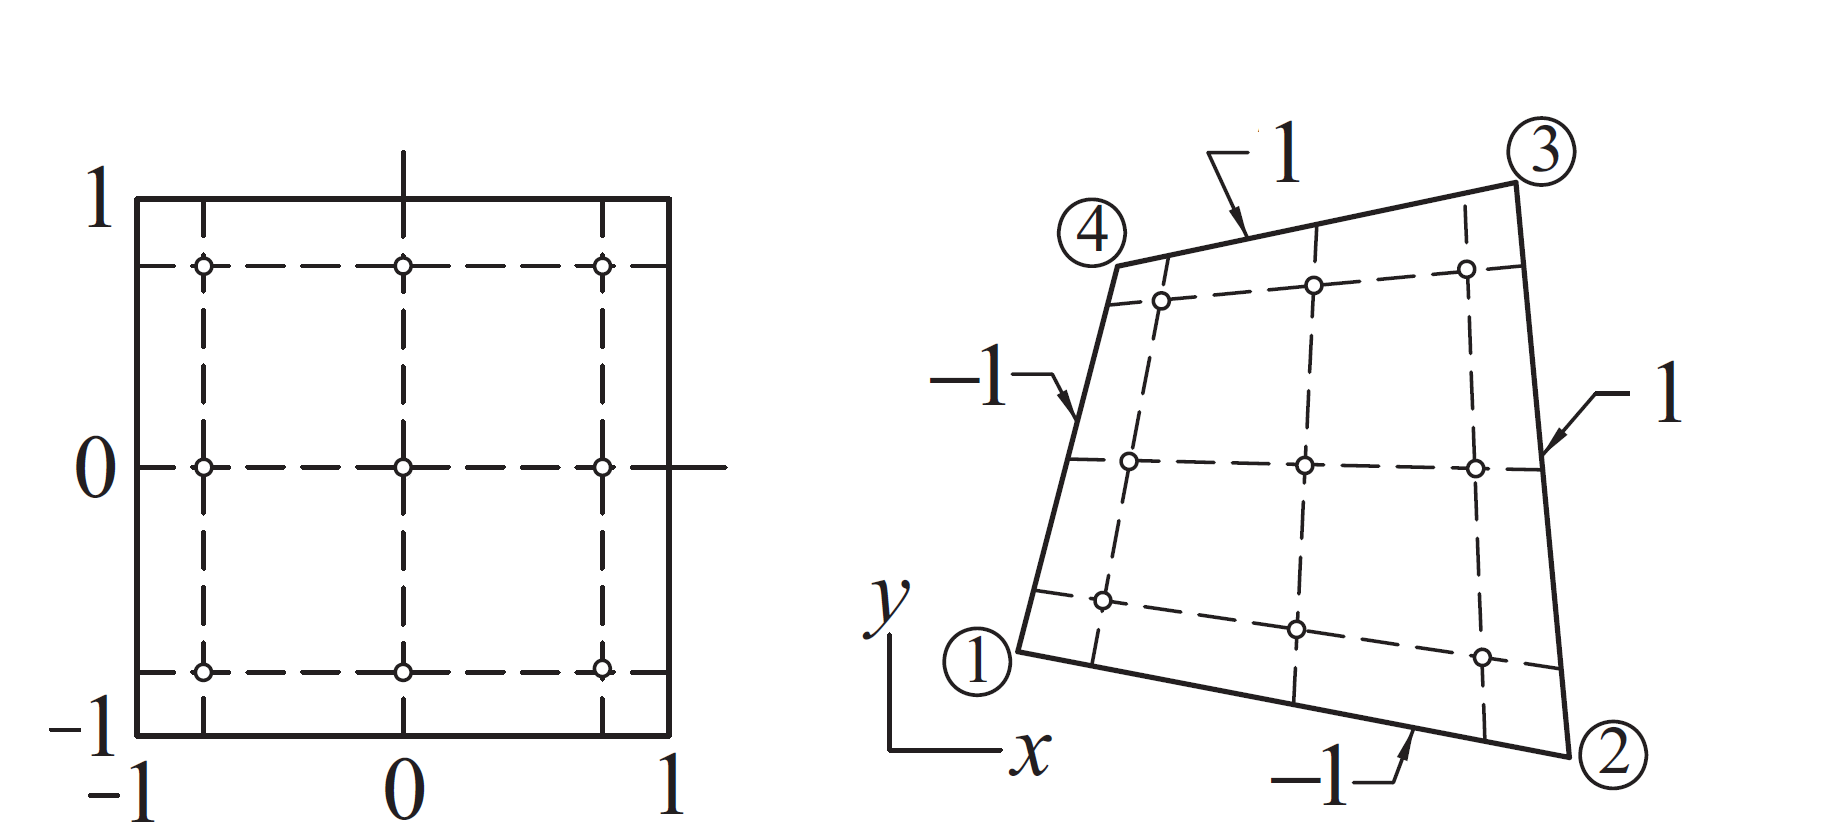

### Triangular elements

In some irregular domains, a quadralateral may be forced to reduce a side length to zero, thereby becoming degenerate quadralateral, or simply a triangle. Since the former can always be divided into two triangles, it is sensible to consider quadrature on a triangle.

In fact, since triangles are the 2D simplex they are able to fill any shape and are typically the go-to for tesselation (space-filling tiling).  

Consider dividing a triangle into 3 parts connecting the verticies with a point P,

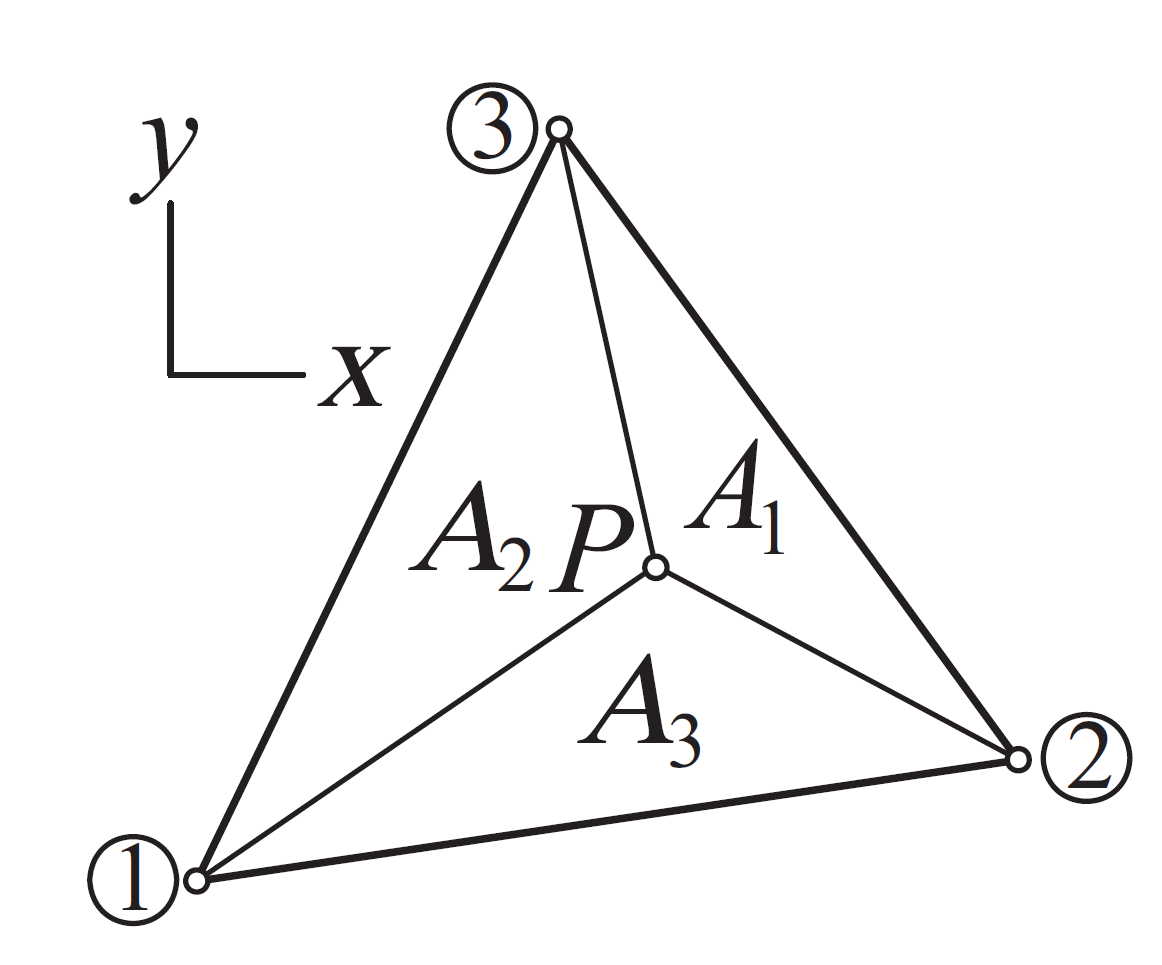

so as to define areas $A_{1,2,3}$. The *area coordinates* of P are,
$$\alpha_i = \frac{A_i}{A}$$

and since $A_1+A_2+A_3 = A$,
$$\alpha_1 +\alpha_2+\alpha_3 = 1$$.

Note that $\alpha_i$ ranges from 0 to 1 when P moves from the opposing side to the corner $i$.

Using these coordinates,
$$\begin{align}
x(\alpha_1, \alpha_2, \alpha_3) = \sum_{i=1}^3 \alpha_i x_i \\
y(\alpha_1, \alpha_2, \alpha_3) = \sum_{i=1}^3 \alpha_i y_i \\
\end{align} $$

and the integration becomes,
$$\int \int_A f(x,y) dA = A \sum_k W_k f\big(x(\alpha_k), y(\alpha_k)\big) $$

with the area,
$$A = \frac{1}{2} \begin{vmatrix}
1 &1 &1 \\
x_1& x_2& x_3 \\
y_1& y_2& y_3
\end{vmatrix}$$

The weights $W_k$ are given by,

| Order (n) | Point | Weight ($W_k$) | Area Coordinates ($\alpha_1$, $\alpha_2$, $\alpha_3$) |
|---|---|---|---|
| Linear | a|  1.0 | (1/3, 1/3, 1/3) |
| Quadratic |a | 1/3 | (1/2, 0, 1/2) |
|  |b| 1/3 | (1/2, 1/2,0) |
|  |c| 1/3 | (0, 1/2, 1/2) |
| Cubic | a| -27/48 | (1/3, 1/3, 1/3) |
|  |b| 25/48 | (1/5, 1/5, 3/5) |
|  |c| 25/48 | (3/5, 1/5, 1/5) |
|  |d| 25/48 | (1/5, 3/5, 1/5) |







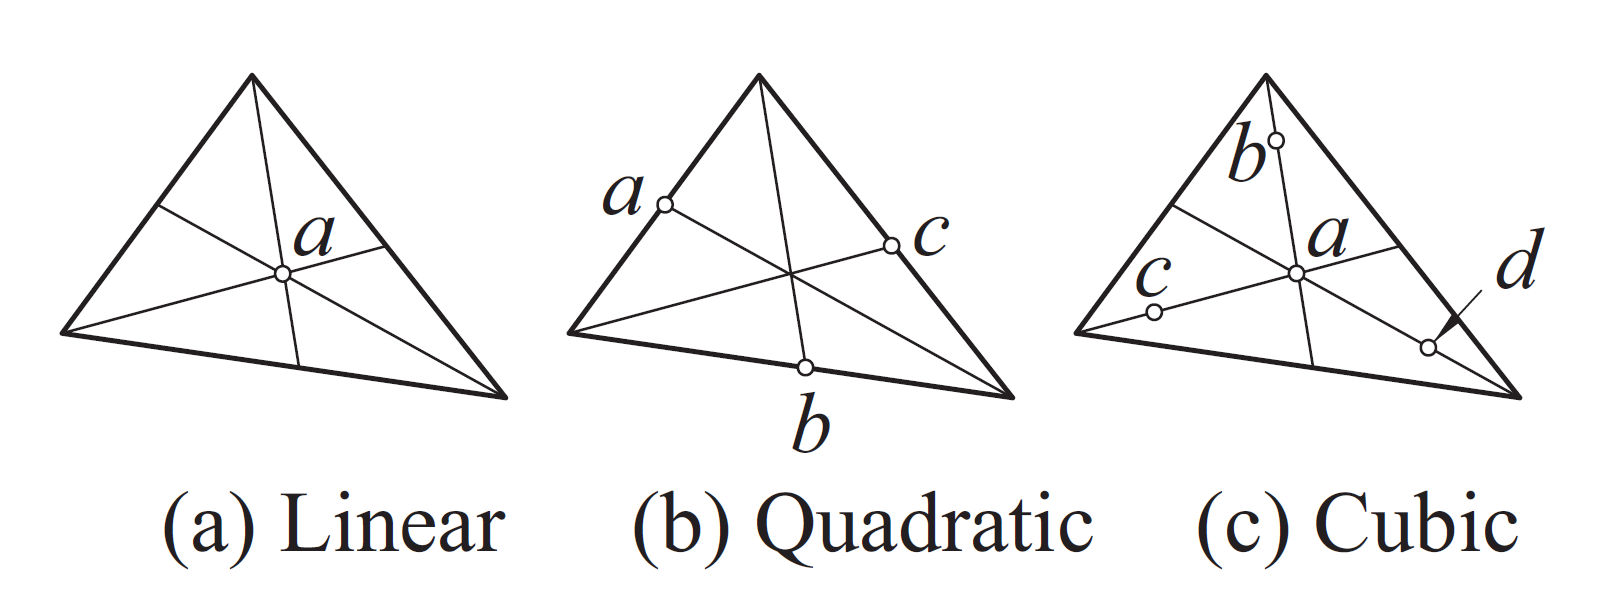